## Exploring Spotify music taste profiles using Machine Learning

In [46]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from math import pi
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points


In [2]:
#Load dataframes

# load my Top tracks
top_annual_df = pd.read_csv("./top_tracks_final.csv")
top_tracks_USA = pd.read_csv("./top_USA_final.csv")
songs_j_loves = pd.read_csv("./songs_j_loves_final.csv")
songs_b_loves = pd.read_csv("./songs_b_loves_final.csv")

In [3]:
songs_j_loves.columns

Index(['name', 'id', 'popularity', 'duration', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'album', 'artist', 'release_date',
       'release_year'],
      dtype='object')

In [4]:
songs_b_loves.columns

Index(['track_name', 'id', 'popularity', 'duration', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'index_col',
       'album', 'artist', 'release_date', 'release_year'],
      dtype='object')

In [5]:
songs_b_loves = songs_b_loves.drop(columns = ["index_col"])

In [6]:
songs_b_loves.rename(columns = {"track_name":"name"}, inplace = True)

In [7]:
column_names_b = songs_b_loves.columns.values.tolist()
column_names_j = songs_j_loves.columns.values.tolist()

In [8]:
print(column_names_b)

['name', 'id', 'popularity', 'duration', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'album', 'artist', 'release_date', 'release_year']


In [9]:
print(column_names_j)

['name', 'id', 'popularity', 'duration', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'album', 'artist', 'release_date', 'release_year']


In [10]:
#confirm column names in both dataframes are identical
# column_names_b == column_names_j

/Users/jeremyosir/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jeremyosir/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jeremyosir/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

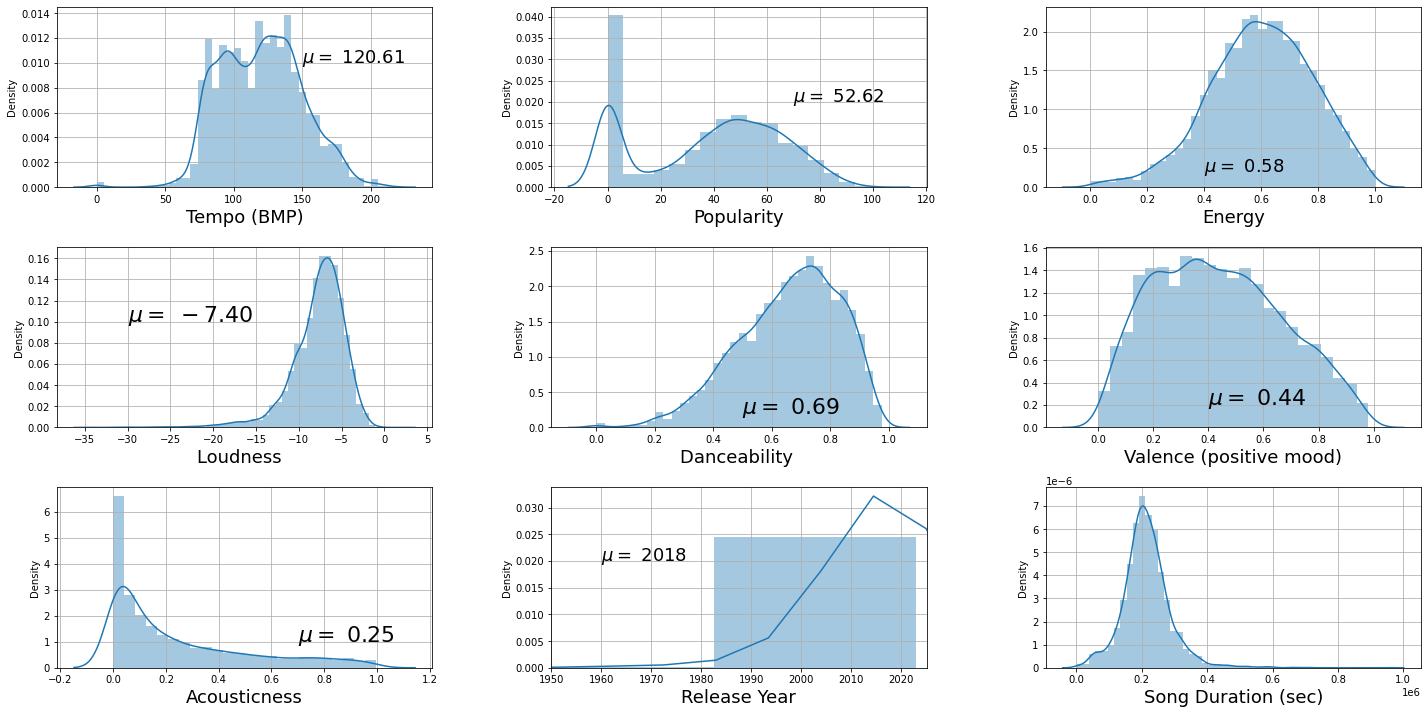

In [11]:
# Visualize distributions of liked tracks
plt.figure(1, figsize=(20, 10),)
# Adjust the subplot layout parameters
plt.subplots_adjust(hspace=0.5, wspace=1.0)

plt.subplot(331)
sns.distplot(songs_j_loves.tempo);
plt.text(150, .010, r'$\mu=\ 120.61$', fontsize=18)
plt.xlabel('Tempo (BMP)', fontsize=18)
plt.grid(True)

plt.subplot(332)
sns.distplot(songs_j_loves.popularity);
plt.text(70, .020, r'$\mu=\ 52.62$', fontsize=18)
plt.xlabel('Popularity', fontsize=18)
plt.grid(True)

plt.subplot(333)
sns.distplot(songs_j_loves.energy);
plt.text(0.4, .2, r'$\mu=\ 0.58$', fontsize=18)
plt.xlabel('Energy', fontsize=18)
plt.grid(True)

plt.subplot(334)
sns.distplot(songs_j_loves.loudness);
plt.text(-30, 0.10, r'$\mu=\ -7.40$', fontsize=22)
plt.xlabel('Loudness  ', fontsize=18)
plt.grid(True)

plt.subplot(335)
sns.distplot(songs_j_loves.danceability);
plt.text(0.5, 0.2, r'$\mu=\ 0.69$', fontsize=22)
plt.xlabel('Danceability ', fontsize=18)
plt.grid(True)

plt.subplot(336)
sns.distplot(songs_j_loves.valence);
plt.text(0.4, 0.2, r'$\mu=\ 0.44$', fontsize=22)
plt.xlabel('Valence (positive mood)', fontsize=18)
plt.grid(True)

plt.subplot(337)
sns.distplot(songs_j_loves.acousticness);
plt.text(0.7, 1.0, r'$\mu=\ 0.25$', fontsize=22)
plt.xlabel('Acousticness', fontsize=18)
plt.grid(True)

plt.subplot(338)
sns.distplot(songs_j_loves.release_year);
plt.text(1960, 0.02, r'$\mu=\ 2018$', fontsize=18)
plt.xlim(1950, 2025)
plt.xlabel('Release Year', fontsize=18)
plt.grid(True)


plt.subplot(339)
sns.distplot(songs_j_loves.duration);
# plt.text(0.01, 0.02, r'$\mu=\ 212.80$', fontsize=8)
plt.xlabel('Song Duration (sec)', fontsize=18)
plt.grid(True)

plt.tight_layout(pad=1.0, w_pad=5.0, h_pad=1.0)

#### Comparing my Top Tracks with Britt's Top Tracks

/Users/jeremyosir/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jeremyosir/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jeremyosir/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

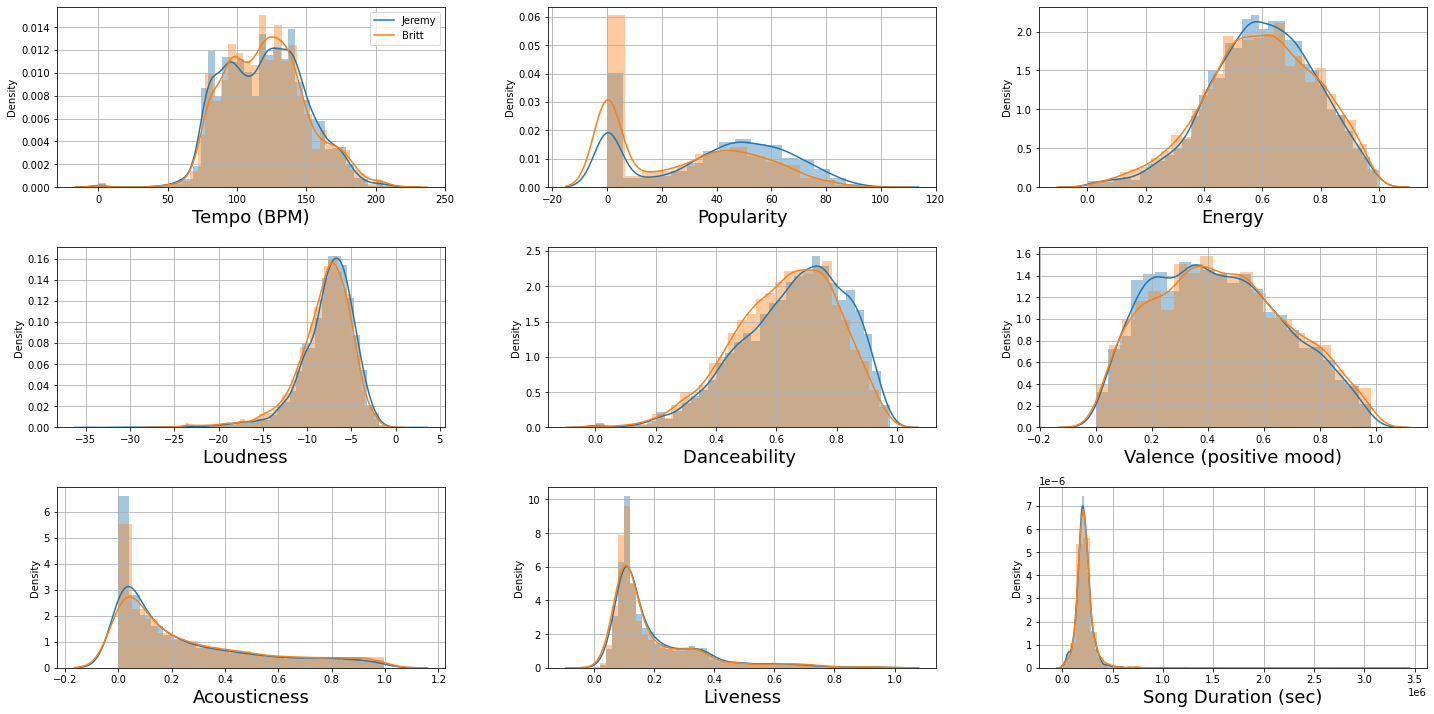

In [12]:
# Visualize distributions of liked tracks
plt.figure(1, figsize=(20, 10),)
# Adjust the subplot layout parameters
plt.subplots_adjust(hspace=0.5, wspace=1.0)

plt.subplot(331)
sns.distplot(songs_j_loves.tempo);
sns.distplot(songs_b_loves.tempo);
plt.xlabel('Tempo (BPM)', fontsize=18);
plt.legend(labels = ["Jeremy", "Britt"]);
plt.grid(True)

plt.subplot(332)
sns.distplot(songs_j_loves.popularity);
sns.distplot(songs_b_loves.popularity);
plt.xlabel('Popularity', fontsize=18)
plt.grid(True)

plt.subplot(333)
sns.distplot(songs_j_loves.energy);
sns.distplot(songs_b_loves.energy);
plt.xlabel('Energy', fontsize=18)
plt.grid(True)

plt.subplot(334)
sns.distplot(songs_j_loves.loudness);
sns.distplot(songs_b_loves.loudness);
plt.xlabel('Loudness  ', fontsize=18)
plt.grid(True)

plt.subplot(335)
sns.distplot(songs_j_loves.danceability);
sns.distplot(songs_b_loves.danceability);
plt.xlabel('Danceability ', fontsize=18)
plt.grid(True)

plt.subplot(336)
sns.distplot(songs_j_loves.valence);
sns.distplot(songs_b_loves.valence);
plt.xlabel('Valence (positive mood)', fontsize=18)
plt.grid(True)

plt.subplot(337)
sns.distplot(songs_j_loves.acousticness);
sns.distplot(songs_b_loves.acousticness);
plt.xlabel('Acousticness', fontsize=18)
plt.grid(True)

plt.subplot(338)
sns.distplot(songs_j_loves.liveness);
sns.distplot(songs_b_loves.liveness);
# plt.xlim(0, 0.02)
plt.xlabel('Liveness', fontsize=18)
plt.grid(True)


plt.subplot(339)
sns.distplot(songs_j_loves.duration);
sns.distplot(songs_b_loves.duration);
# plt.text(0.01, 0.02, r'$\mu=\ 212.80$', fontsize=8)
plt.xlabel('Song Duration (sec)', fontsize=18)
plt.grid(True)

plt.tight_layout(pad=1.0, w_pad=5.0, h_pad=1.0)

#### Comparing my Top Tracks with the Top USA Tracks

/Users/jeremyosir/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jeremyosir/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jeremyosir/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

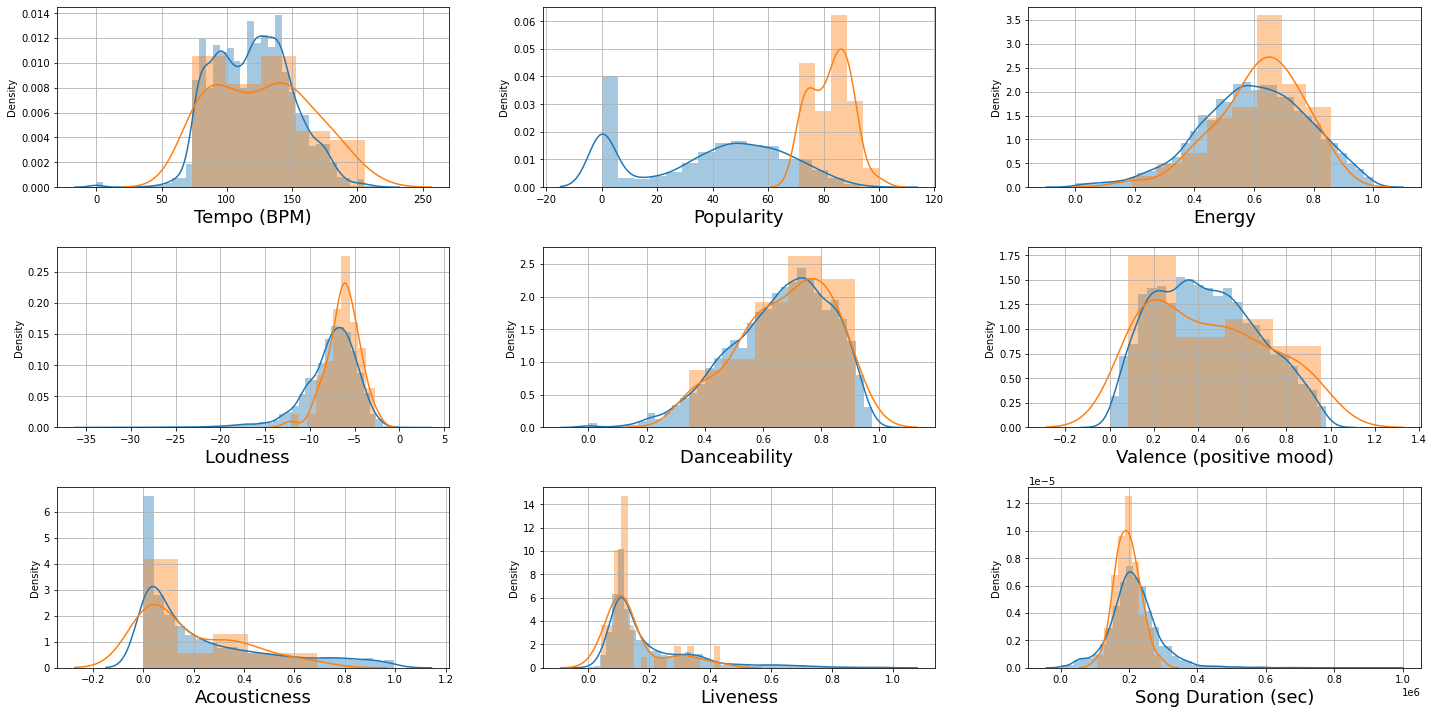

In [13]:
# Visualize distributions of liked tracks
plt.figure(1, figsize=(20, 10),)
# Adjust the subplot layout parameters
plt.subplots_adjust(hspace=0.5, wspace=1.0)

plt.subplot(331)
sns.distplot(songs_j_loves.tempo);
sns.distplot(top_tracks_USA.tempo);
plt.xlabel('Tempo (BPM)', fontsize=18)
plt.grid(True)

plt.subplot(332)
sns.distplot(songs_j_loves.popularity);
sns.distplot(top_tracks_USA.popularity);
plt.xlabel('Popularity', fontsize=18)
plt.grid(True)

plt.subplot(333)
sns.distplot(songs_j_loves.energy);
sns.distplot(top_tracks_USA.energy);
plt.xlabel('Energy', fontsize=18)
plt.grid(True)

plt.subplot(334)
sns.distplot(songs_j_loves.loudness);
sns.distplot(top_tracks_USA.loudness);
plt.xlabel('Loudness  ', fontsize=18)
plt.grid(True)

plt.subplot(335)
sns.distplot(songs_j_loves.danceability);
sns.distplot(top_tracks_USA.danceability);
plt.xlabel('Danceability ', fontsize=18)
plt.grid(True)

plt.subplot(336)
sns.distplot(songs_j_loves.valence);
sns.distplot(top_tracks_USA.valence);
plt.xlabel('Valence (positive mood)', fontsize=18)
plt.grid(True)

plt.subplot(337)
sns.distplot(songs_j_loves.acousticness);
sns.distplot(top_tracks_USA.acousticness);
plt.xlabel('Acousticness', fontsize=18)
plt.grid(True)

plt.subplot(338)
sns.distplot(songs_j_loves.liveness);
sns.distplot(top_tracks_USA.liveness);
# plt.xlim(0, 0.02)
plt.xlabel('Liveness', fontsize=18)
plt.grid(True)


plt.subplot(339)
sns.distplot(songs_j_loves.duration);
sns.distplot(top_tracks_USA.duration);
# plt.text(0.01, 0.02, r'$\mu=\ 212.80$', fontsize=8)
plt.xlabel('Song Duration (sec)', fontsize=18)
plt.grid(True)

plt.tight_layout(pad=1.0, w_pad=5.0, h_pad=1.0)

### Radar chart to compare features

#  first start with creating a one-person radar chart
steps:
1. create a parameter object that includes the features we want to visualize
2. create a range object that captures the min and max values for each (multiply by 25% for buffer)
3. create a list object that contains the values of the features

In [32]:
# Create a new dataframe that only contains the columns we are interested in visualizing

df_j = songs_j_loves.drop(columns= ['release_year', 'duration', 'mode', 'key', 
                                    'release_date', 'id', 'album', 'artist', 'name'])

In [33]:
df_j.columns

Index(['popularity', 'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')

In [38]:
# For interpretability, scale the feature values using standard scaler
# using standard scaler since it is more robust to outliers

df_j_scaled = df_j

scaler = MinMaxScaler()

# transform numerical features that we will use in our models -- focus on just musical attributes
df_j_scaled[['popularity','danceability', 'energy','loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']] = scaler.fit_transform(df_j_scaled[['popularity', 'danceability', 'energy','loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']])


df_j_scaled.head()



,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.758,0.355,0.940,0.866,0.191,0.000,0.000,0.436,0.536,0.849
1,0.525,0.669,0.630,0.706,0.079,0.083,0.003,0.096,0.309,0.406
2,0.616,0.431,0.644,0.701,0.034,0.000,0.335,0.372,0.108,0.672
3,0.616,0.614,0.695,0.786,0.025,0.081,0.711,0.085,0.333,0.464
4,0.616,0.755,0.751,0.768,0.171,0.129,0.000,0.113,0.412,0.753


In [39]:
# when we check the means and std, we see that the scaling worked
df_j_scaled.describe()

,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,4565.000,4565.000,4565.000,4565.000,4565.000,4565.000,4565.000,4565.000,4565.000,4565.000
mean,0.392,0.677,0.599,0.738,0.185,0.248,0.063,0.205,0.447,0.556
std,0.268,0.176,0.181,0.089,0.158,0.267,0.200,0.159,0.235,0.137
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.111,0.560,0.481,0.699,0.054,0.036,0.000,0.105,0.252,0.445
50%,0.444,0.698,0.604,0.751,0.125,0.141,0.000,0.136,0.429,0.556
75%,0.606,0.810,0.730,0.794,0.289,0.391,0.001,0.264,0.619,0.649
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [40]:
# Calculate the mean value of my song attributes
means_j = df_j_scaled.mean()
print(means_j)

popularity         0.392
danceability       0.677
energy             0.599
loudness           0.738
speechiness        0.185
acousticness       0.248
instrumentalness   0.063
liveness           0.205
valence            0.447
tempo              0.556
dtype: float64


In [41]:
# Create an list object that stores the variable names
params = list(means_j.index)
params

['popularity',
 'danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo']

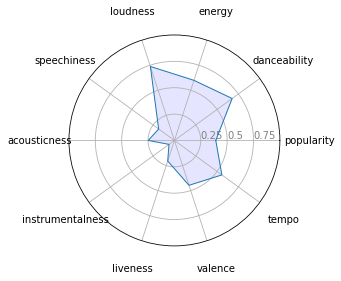

In [68]:
# number of variable
N = len(params)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values= list(means_j.values)
values += values[:1]
values
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# set the color for the outer background
plt.figure(facecolor='white')

# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], params, color='black', size=10)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.25,0.50,0.75], ["0.25","0.5","0.75"], color="grey", size=10)
plt.ylim(0,1)

 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'blue', alpha=0.1)

ax.tick_params(pad=19)


# Show the graph
plt.show()

In [19]:
# create an object that stores the ranges
ranges = []
j_values = []

# now iterate over parameter list to pass values



['popularity',
 'duration',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'release_year']

## Feature processing - scale the data

In [ ]:
scaled_df = songs_j_loves

In [ ]:
# Scale data -- use StandardScaler to normalize the data
scaler = StandardScaler()

# transform numerical features that we will use in our models -- focus on just musical attributes
scaled_df[['danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']] = scaler.fit_transform(scaled_df[['danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']])



In [ ]:
scaled_df.columns

In [ ]:
scaled_df = scaled_df.drop(columns= ['title', 'album', 'artist', 'key', "index_col", 
                                     "id",'release_year', 'popularity','duration'])
scaled_df.columns

In [ ]:
# Project onto 2-D space using TSNE algorithm
X_scaled = TSNE(n_components=2, random_state=0).fit_transform(scaled_df)

In [ ]:
# Plot tracks

fig = figure(figsize=(20, 20))
ax = axes(frameon=False)
setp(ax, xticks=(), yticks=())
subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)
scatter(X_scaled[:, 0], X_scaled[:, 1], s=80,   marker="8")

for row_id in range(0, len(songs_j_loves)):
    #if (df.ARTIST[row_id] in ['The National']):
        target_word = songs_j_loves.title[row_id]
        xx = X_scaled[row_id, 0]
        yy = X_scaled[row_id, 1]
        plt.annotate(target_word, (xx,yy), size=10, xytext=(-90,90), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='round4', fc='white', alpha=0.3),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                            color='red'))

In [ ]:
# Plot specific tracks

fig = figure(figsize=(10, 10))
ax = axes(frameon=False)
setp(ax, xticks=(), yticks=())
subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)
scatter(X_scaled[:, 0], X_scaled[:, 1], s=80,   marker="8", alpha = 0.4)

for row_id in range(0, len(songs_j_loves)):
    if (songs_j_loves.artist[row_id] in ['Yaeji']):
        target_word = songs_j_loves.title[row_id]
        xx = X_scaled[row_id, 0]
        yy = X_scaled[row_id, 1]
        plt.annotate(target_word, (xx,yy), size=15, xytext=(-90,90), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='round4', fc='white', alpha=0.8),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                            color='red'))

In [ ]:
# Instantiate PCA to project features onto 2-D space

pca_scaled = PCA(n_components=2)
pca_scaled.fit(scaled_df)

# Determine transformed features
x_pca_scaled = pca_scaled.fit_transform(scaled_df)

In [ ]:
print(pca_scaled.explained_variance_ratio_) 


In [ ]:
# Determine explained variance using explained_variance_ration_ attribute
print(pca_scaled.explained_variance_ratio_) 
exp_var_pca_scaled = pca_scaled.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca_scaled)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca_scaled)), exp_var_pca_scaled, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
clf_scaled = svm.OneClassSVM(kernel="rbf", gamma=0.02, nu=0.1)
clf_scaled.fit(x_pca_scaled)

In [ ]:
xx, yy = np.meshgrid(np.linspace(-500, 800, 500), np.linspace(-200,800, 500))

Z = clf_scaled.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(15, 10),)
#plt.title("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.Blues_r)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=3, colors='red')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='orange')

#visualize song titles

for row_id in range(0, len(songs_j_loves)):
    if (songs_j_loves.artist[row_id] in ['Yaeji']):
        target_word = songs_j_loves.title[row_id]
        xxx = x_pca_scaled[row_id, 0]
        yyy = x_pca_scaled[row_id, 1]
        plt.annotate(target_word, (xxx,yyy), size=8, xytext=(-90,90), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='round4', fc='white', alpha=0.3),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                            color='red'))


b1 = plt.scatter(x_pca_scaled[:, 0], x_pca_scaled[:, 1], c='black', s=10, alpha= 0.3)
plt.axis('tight')
plt.xlim((-20, 20))
plt.ylim((-10, 10))

leg = plt.legend([a.collections[0], b1, ],
           ["learned frontier", "training observations"],
           loc="upper left",prop={'size':12}, frameon=True)

plt.show()

In [ ]:
plt.scatter(x_pca_scaled[:, 0], x_pca_scaled[:, 1], c='red', alpha= 0.3)

In [ ]:
scaled_df.shape

In [ ]:
### Retry - this time setting PCA n_components to be the same as number of features
# Instantiate PCA

pca_scaled_10 = PCA(n_components=10)
pca_scaled_10.fit(scaled_df)

# Determine transformed features
x_pca_scaled10 = pca_scaled_10.fit_transform(scaled_df)

In [ ]:
np.cumsum(pca_scaled_10.explained_variance_ratio_ *100)

In [ ]:
plt.plot(np.cumsum(pca_scaled_10.explained_variance_ratio_*100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance (%)')

print('Variance explained by the First principal component = ',
     np.cumsum(pca_scaled_10.explained_variance_ratio_*100)[0])

print('Variance explained by the First 2 principal component = ',
     np.cumsum(pca_scaled_10.explained_variance_ratio_*100)[1])

print('Variance explained by the First 3 principal component = ',
     np.cumsum(pca_scaled_10.explained_variance_ratio_*100)[2])

print('Variance explained by the First 10 principal component = ',
     np.cumsum(pca_scaled_10.explained_variance_ratio_*100)[9])



In [ ]:
pca10_components = abs(pca_scaled_10.components_)
print(pca10_components)

In [ ]:
print('Top 3 most important features in each component')
print('===============================================')
for row in range(pca10_components.shape[0]):
    # get the indices of the top 4 values in each row
    temp = np.argpartition(-(pca10_components[row]), 3)
    
    # sort the indices in descending order
    indices = temp[np.argsort((-pca10_components[row])[temp])][:3]
    
    # print the top 4 feature names
    print(f'Component {row}: {scaled_df.columns[indices].to_list()}')